In [1]:
import numpy as np

#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl


import sys
sys.path.append("../")
import GSHEWaveform

%load_ext autoreload
%autoreload 2

from tqdm import tqdm

In [2]:
data = GSHEWaveform.read_shooting(13, "../data", 0.2)

Eliminating 147 point due to beta with average 0.9592 loops.


# Plot the worst delays to

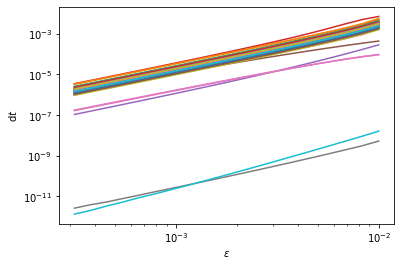

In [69]:
Xgshe = data["Xgshe"]
Xgeo = data["Xgeo"]
betas = data["betas"]
eps = data["eps"]

snr = betas[:, 1] / betas[:, 0]
notnans = ~np.isnan(snr)
Nworst = 50

plt.figure()
for k in np.argsort(snr[notnans])[::-1][:Nworst]:
    dt = np.abs(Xgshe[notnans, ...][k, :, 2] - Xgeo[notnans, ...][k, 2])
    plt.plot(eps, dt)
    
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"$\mathrm{d}t$")
# plt.savefig("/Users/richard/Downloads/dt.png")
plt.show()

# Summary Plots

In [4]:
grid = data["grid"]
alphas = data["alphas"]
betas = data["betas"]

hull = GSHEWaveform.build_shadowhull(grid, betas[:, 0], N=200)
vals = GSHEWaveform.fillshadow(grid, betas[:, 0], hull)

## BH Shadow

<IPython.core.display.Javascript object>


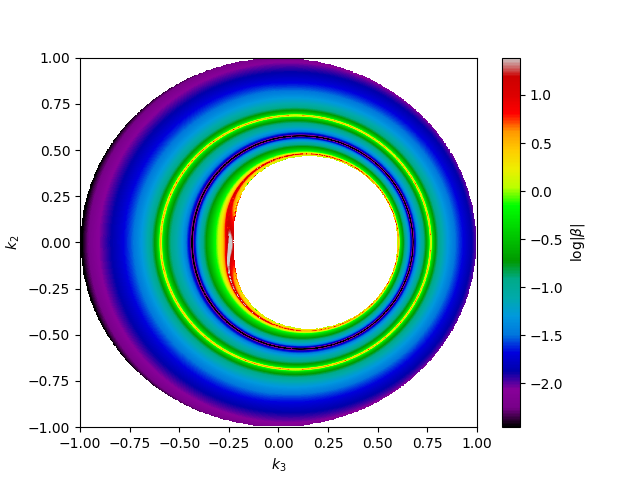

In [8]:
X, Y, Z = GSHEWaveform.smoothshadow(grid, np.log10(vals), 2500, method="linear")
qs = [1, 99.9] # Colourbar percentiles

# GSHEWaveform.setmplstyle("../plot_style.txt")

fig, ax = plt.subplots()
vmin, vmax = np.percentile(Z[~np.isnan(Z)].reshape(-1,), qs)
cm = ax.pcolormesh(-X, Y, Z, shading="auto", cmap="nipy_spectral", rasterized=True, vmin=vmin, vmax=vmax)


fig.colorbar(cm, ax=ax, label=r"$\log |\beta|$")
ax.set_xlabel("$k_3$")
ax.set_ylabel("$k_2$")
plt.savefig("/Users/richard/Downloads/shadow_beta.pdf", dpi=600, bbox_inches="tight")
fig.show()

In [38]:
import joblib
joblib.dump({"X": -X, "Y": Y, "Z": Z}, "../additional_data/betas.p")

['../additional_data/betas.p']

In [39]:
!ls ../

additional_data  GSHESymbolical  notebooks	 runs
data		 GSHEWaveform	 plot_style.txt  scripts
GSHEIntegrator	 LICENSE	 README.md	 thesis_plots


## $\Upsilon$ plot

/home/miguel/code/GSHE/scripts/../GSHEWaveform/shadow.py:83: RuntimeWarning: invalid value encountered in sqrt
  area = numpy.sqrt(1 / (1 - radius2))


Text(0.5, 0, '$\\beta_{\\rm min}$')

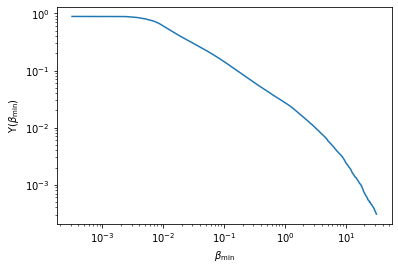

In [5]:
betalims = np.logspace(-3.5, 1.5, 1000)
dk = data["xs"][1] - data["xs"][0]

upsilons = GSHEWaveform.get_upsilon(grid, vals, betalims, dk)


plt.figure()
plt.plot(betalims, upsilons)

plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$\Upsilon(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")

# plt.savefig("/Users/richard/Downloads/test.png")
# plt.show()

In [6]:
betalims = np.logspace(-3.5, 1.5, 1000)
dk = data["xs"][1] - data["xs"][0]

grid = data["grid"]
alphas = data["alphas"]
betas = data["betas"][:,0]*np.sign(data["Xgshe"][:,-1,2]-data["Xgeo"][:,2])

hull = GSHEWaveform.build_shadowhull(grid, betas, N=200)
vals = GSHEWaveform.fillshadow(grid, betas, hull)
mu_vals = GSHEWaveform.fillshadow(grid, data["Xgeo"][:, 8] , hull)

Text(0.5, 0, 'N loop')

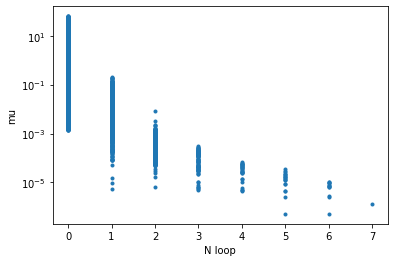

In [7]:
#plt.plot(data["Xgeo"][:,2],data["Xgeo"][:,5],'.')
plt.semilogy(data["Xgeo"][:,5],np.abs(data["Xgeo"][:,8]),'.')
plt.ylabel('mu')
plt.xlabel('N loop')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (7,) + inhomogeneous part.

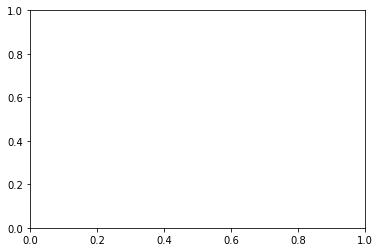

In [20]:
import matplotlib.pyplot as plt

# Split data into groups based on the values of data["Xgeo"][:,5]
groups = {}
for i in range(7):
    groups[i] = np.abs(data["Xgeo"][:,8])[data["Xgeo"][:,5] == i]

# Create a figure with a single axis
fig, ax = plt.subplots()#figsize=(10, 5))

# Generate a violin plot for each group on the same axis
#ax.violinplot(groups.values(), showmeans=False, showmedians=True)
ax.violinplot([g for g in groups.values()])
ax.set_xticks(range(1, 8))
ax.set_xticklabels([f"{i}" for i in range(7)])
ax.set_xlabel("N loops")
ax.set_ylabel(r"$|\mu|$")
ax.set_yscale('log')
ax.grid(alpha=0.3)
# ax.set_title("Violin plot of |Xgeo[:,8]| for each value of Xgeo[:,5]")


In [67]:
for N in range(7):
    print(N)
    points = np.where(N)
    mu_data_N = data["Xgeo"][:,5]

0
1
2
3
4
5
6


<ipython-input-33-2c336306de7d>:12: RuntimeWarning: invalid value encountered in less_equal
  points = np.where((Nloop <=0) & (mu_vals**2 > 0))
<ipython-input-33-2c336306de7d>:12: RuntimeWarning: invalid value encountered in greater
  points = np.where((Nloop <=0) & (mu_vals**2 > 0))


0.8729644566497606


<ipython-input-33-2c336306de7d>:12: RuntimeWarning: invalid value encountered in less_equal
  points = np.where((Nloop <=0) & (mu_vals**2 > 0))
<ipython-input-33-2c336306de7d>:12: RuntimeWarning: invalid value encountered in greater
  points = np.where((Nloop <=0) & (mu_vals**2 > 0))


0.8209166646573685


<ipython-input-33-2c336306de7d>:12: RuntimeWarning: invalid value encountered in less_equal
  points = np.where((Nloop <=0) & (mu_vals**2 > 0))
<ipython-input-33-2c336306de7d>:12: RuntimeWarning: invalid value encountered in greater
  points = np.where((Nloop <=0) & (mu_vals**2 > 0))


0.13132813317611503


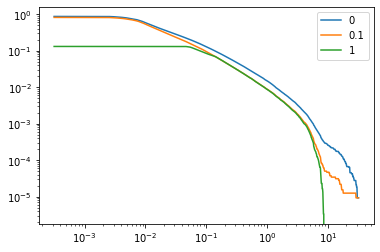

In [33]:
betalims = np.logspace(-3.5, 1.5, 1000)
dk = data["xs"][1] - data["xs"][0]
Nloop = data["Xgeo"][:,5]

ks = grid
abs_mu_min = 0.1


# print(points)

for abs_mu_min in [0,0.1,1]:
    points = np.where((Nloop <=0) & (mu_vals**2 > 0))

    betas = np.copy(vals)[points]
    mus = np.copy(mu_vals)[points]
    
    betas = np.abs(betas)

    betas[np.isnan(betas)] = 0.
    mus[np.isnan(mus)] = np.infty

    radius2 = np.sum(ks**2, axis=1)[points]
    area = np.sqrt(1 / (1 - radius2))
    mask = radius2 <= 1
    mask *= np.abs(mus) > abs_mu_min

    ups = np.zeros_like(betalims)
    norm = np.zeros_like(betalims)
    for i, lim in enumerate(betalims):
        H = (betas > lim).astype(int)
        ups[i] = np.sum((H * area)[mask]) * dk**2
        norm[i] = np.sum((area)[mask]) * dk**2

    ups /= (2 * np.pi)

    plt.loglog(betalims,ups,label='%g'%abs_mu_min)
    print(ups[0])
plt.legend()
# # 2np.pi normalisation
# ups /= (2 * np.pi)
# plt.hist(betas,500,weights=area/np.abs(mus))
# plt.hist(betas,500,weights=area)
# plt.yscale('log')


In [59]:
def get_upsilon_src(ks, betas, betalims, mus, Nloop, dk,abs_mu_min=0,Nloop_max = np.infty):
    r"""
    Calculate :math:`\Upsilon` as a function of :math:`\beta_{\rm lim}`. Sets
    :math:`\beta` that are NaN to 0.

    Arguments
    ---------
    ks : np.ndarray
        Array of :math:`k_2` and :math:`k_3` of shape (-1 ,2).
    betas : np.ndarray
        Array of :math:`\beta` as a function of `ks`.
    betalims : np.ndarray
        Array of :math:`\beta_{\rm lim}`.
    dk : float
        The :math:`k_2` and :math:`k_3` spacing, expected to be the same for
        both.

    Returns
    -------
    upsilon : np.ndarray
        The :math:`\Upsilon` values.
    """
    if not (ks.ndim == 2 and ks.shape[1] == 2):
        raise TypeError("`ks` array shape must be (-1, 2).")
    if not betas.ndim == 1:
        raise TypeError("`betas` must be a 1-dimensional array.")
    if not betalims.ndim == 1:
        raise TypeError("`betalims` must be a 1-dimensional array.")
        
    #points = np.where((Nloop <=Nloop_max) & (mu_vals*x > 0))
    
    # Set NaNs to 0 and make a copy
    betas = np.copy(betas)
    mus = np.copy(mus)
    
    betas = np.abs(betas)
    
    betas[np.isnan(betas)] = 0.
    mus[np.isnan(mus)] = np.infty

    radius2 = np.sum(ks**2, axis=1)
    area = np.sqrt(1 / (1 - radius2))/np.abs(mus)
    mask = radius2 <= 1
    mask *= np.abs(mus) > abs_mu_min
    mask *= Nloop <= Nloop_max

    ups = np.zeros_like(betalims)
    norm = np.zeros_like(betalims)
    for i, lim in enumerate(betalims):
        H = (betas > lim).astype(int)
        ups[i] = np.sum((H * area)[mask]) * dk**2
        norm[i] = np.sum(area[mask]) * dk**2

    #normalization: for N_loop = 0, the full sphere gets covered 3/4 times: the half sphere away from the BH + the trajectories that are retrolensed, but don't compute as a full loop.
    ups /= (1.5*4 * np.pi)
    return ups



get_upsilon_src(grid, vals, betalims,mu_vals, Nloop, dk);
#print('.')

<ipython-input-59-1455255c8eea>:42: RuntimeWarning: invalid value encountered in sqrt
  area = np.sqrt(1 / (1 - radius2))/np.abs(mus)
<ipython-input-59-1455255c8eea>:45: RuntimeWarning: invalid value encountered in less_equal
  mask *= Nloop <= Nloop_max


/home/miguel/code/GSHE/scripts/../GSHEWaveform/shadow.py:83: RuntimeWarning: invalid value encountered in sqrt
  area = numpy.sqrt(1 / (1 - radius2))
<ipython-input-59-1455255c8eea>:42: RuntimeWarning: invalid value encountered in sqrt
  area = np.sqrt(1 / (1 - radius2))/np.abs(mus)
<ipython-input-59-1455255c8eea>:45: RuntimeWarning: invalid value encountered in less_equal
  mask *= Nloop <= Nloop_max


0 0.8785914085635215


<ipython-input-59-1455255c8eea>:42: RuntimeWarning: invalid value encountered in sqrt
  area = np.sqrt(1 / (1 - radius2))/np.abs(mus)
<ipython-input-59-1455255c8eea>:45: RuntimeWarning: invalid value encountered in less_equal
  mask *= Nloop <= Nloop_max


0.01 0.7149402047221604


<ipython-input-59-1455255c8eea>:42: RuntimeWarning: invalid value encountered in sqrt
  area = np.sqrt(1 / (1 - radius2))/np.abs(mus)
<ipython-input-59-1455255c8eea>:45: RuntimeWarning: invalid value encountered in less_equal
  mask *= Nloop <= Nloop_max


0.05 0.33709572953251676


<ipython-input-59-1455255c8eea>:42: RuntimeWarning: invalid value encountered in sqrt
  area = np.sqrt(1 / (1 - radius2))/np.abs(mus)
<ipython-input-59-1455255c8eea>:45: RuntimeWarning: invalid value encountered in less_equal
  mask *= Nloop <= Nloop_max


0.1 0.24256958787681535


<ipython-input-59-1455255c8eea>:42: RuntimeWarning: invalid value encountered in sqrt
  area = np.sqrt(1 / (1 - radius2))/np.abs(mus)
<ipython-input-59-1455255c8eea>:45: RuntimeWarning: invalid value encountered in less_equal
  mask *= Nloop <= Nloop_max


0.5 0.17836528738482033


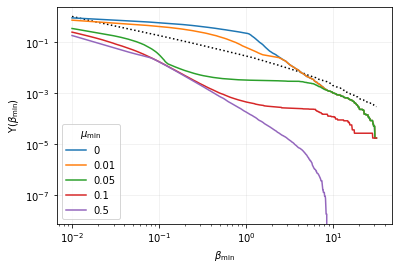

In [62]:
betalims = np.logspace(-2., 1.5, 1000)
#betalims = np.geomspace(np.nanmin(np.abs(vals)),np.nanmax(vals),1000)
dk = data["xs"][1] - data["xs"][0]

upsilons = GSHEWaveform.get_upsilon(grid, vals, betalims, dk)


plt.figure()
plt.plot(betalims, upsilons/upsilons[0],':k')

for mu_cut in [0,0.01,0.05,0.1,0.5]:
    upsilons_src = get_upsilon_src(grid, vals, betalims,mu_vals, Nloop, dk,abs_mu_min=mu_cut, Nloop_max=0)
    plt.plot(betalims, upsilons_src,label='%g'%mu_cut)
    print(mu_cut, upsilons_src[0])

plt.xscale("log")
plt.yscale("log")
plt.legend(title=r'$\mu_{\rm min}$')
plt.ylabel(r"$\Upsilon(\beta_{\rm min})$")
plt.xlabel(r"$\beta_{\rm min}$")
plt.grid(alpha=0.2)
# plt.savefig("/Users/richard/Downloads/test.png")
# plt.show()

In [105]:
Xgshe = data["Xgshe"]
Xgeo = data["Xgeo"]
betas = data["betas"]

notnans = ~np.isnan(Xgeo[:, 2])

# $\log |\mu_{\rm geo}| - \beta$

<ipython-input-107-29227417ac54>:8: RuntimeWarning: invalid value encountered in sqrt
  logda = (np.log10(1 / np.sqrt(1 - np.sum(data["grid"]**2, axis=1))))


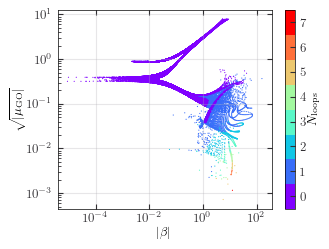

In [107]:
plt.figure()

cmap = plt.cm.rainbow
ticks = np.arange(0, np.max(Xgeo[notnans, 5]) + 1)
norm = mpl.colors.BoundaryNorm(np.arange(-0.5, np.max(Xgeo[notnans, 5]) + 1), cmap.N)


logda = (np.log10(1 / np.sqrt(1 - np.sum(data["grid"]**2, axis=1))))

logda[notnans] /= np.median(logda[notnans])/4

# s=logda[notnans],
plt.scatter(betas[notnans, 0], np.abs(Xgeo[notnans, 8])**0.5, c=Xgeo[notnans, 5], s=0.8,
            cmap=cmap, norm=norm, edgecolor="none", rasterized=True, marker="h")
cb = plt.colorbar(ticks=ticks, label=r"$N_{\rm loops}$")
cb.minorticks_off()

plt.xscale("log")
plt.yscale("log")

ylims = list(plt.ylim())
ylims[0] = 3e-5
# plt.ylim(*ylims)
# plt.grid(lw=0.2)

# cb.ax.minorticks_on()

plt.xlabel(r"$|\beta|$")
plt.ylabel(r"$\sqrt{|\mu_{\rm GO}|}$")
#plt.savefig("/Users/richard/Downloads/beta_mu.pdf", dpi=500, bbox_inches="tight")
#plt.show()
plt.grid(alpha=0.3)

# $\mu$ dependence of $\epsilon$

<ipython-input-20-af09a7f9ae74>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


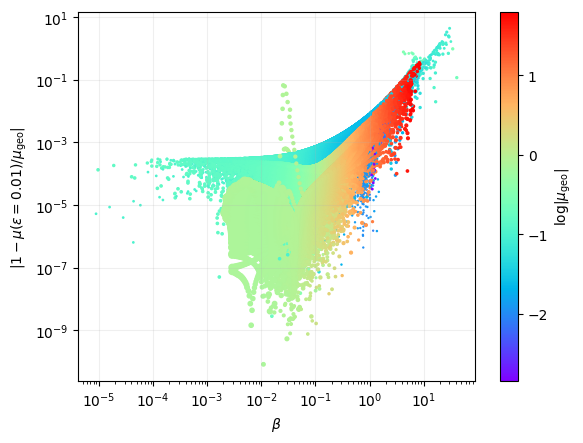

In [20]:
notnans = ~np.isnan(Xgeo[:, 8]) & (Xgeo[:, 5] == 0)


relmu = 1 - Xgshe[notnans, ...][:, -1, 8] / Xgeo[notnans, ...][:, 8]
relmu = np.abs(relmu)


GSHEWaveform.setmplstyle()
fig, ax = plt.subplots()

cbar = ax.scatter(betas[notnans, 0], relmu, s=logda[notnans], c=np.log10(np.abs(Xgeo[notnans, 8])), cmap="rainbow")
fig.colorbar(cbar, label=r"$\log |\mu_{\rm geo}|$")


ax.set_xlabel(r"$\beta$")
ax.set_ylabel(r"$\left|1 - \mu(\epsilon=0.01) / \mu_{\rm geo}\right|$")
ax.set_xscale("log")
ax.set_yscale("log")
# ax.tick_params(axis='x', which='minor', right=True)


plt.grid(True, which="major", alpha=0.2)
# plt.ylim(1e-7, 1e3)

# plt.savefig("/Users/richard/Downloads/mu_ratio.png", dpi=600)

fig.show()

In [26]:
grid = data["grid"]
betas = data["betas"]
relmu = np.abs(1 - Xgshe[:, -1, 8] / Xgeo[:, 8])

hull = GSHEWaveform.build_shadowhull(grid, relmu, N=200)
relmu = GSHEWaveform.fillshadow(grid, relmu, hull)



<ipython-input-27-67fef31a7394>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


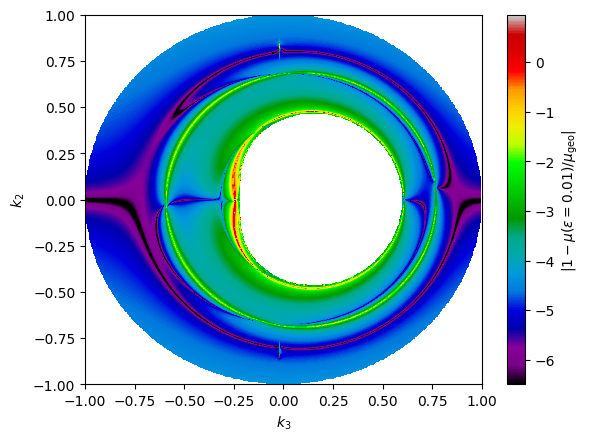

In [27]:

X, Y, Z = GSHEWaveform.smoothshadow(grid, np.log10(relmu), 2500, method="linear")
qs = [1, 99.99] # Colourbar percentiles

GSHEWaveform.setmplstyle()

fig, ax = plt.subplots()
vmin, vmax = np.percentile(Z[~np.isnan(Z)].reshape(-1,), qs)
cm = ax.pcolormesh(-X, Y, Z, shading="auto", cmap="nipy_spectral", rasterized=True, vmin=vmin, vmax=vmax)


fig.colorbar(cm, ax=ax, label=r"$\left|1 - \mu(\epsilon=0.01) / \mu_{\rm geo}\right|$")
ax.set_xlabel("$k_3$")
ax.set_ylabel("$k_2$")
#plt.savefig("/Users/richard/Downloads/shadow_relmu.pdf", dpi=600, bbox_inches="tight")
fig.show()

In [28]:
data = GSHEWaveform.read_shooting(13, "../data", 0.2)

grid = data["grid"]
mugeo = np.abs(data["Xgeo"][:, 8])
# mugeo = np.abs(data["Xgshe"][:, -1, 8])

hull = GSHEWaveform.build_shadowhull(grid, mugeo, N=200)
mugeo = GSHEWaveform.fillshadow(grid, mugeo, hull)

/home/miguel/code/GSHE/scripts/../GSHEWaveform/io.py:70: RuntimeWarning: invalid value encountered in less
  betamask = (data["betas"][:, 1] / data["betas"][:, 0]) < betathreshold


Eliminating 147 point due to beta with average 0.9592 loops.


<ipython-input-29-bd8f78444d23>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


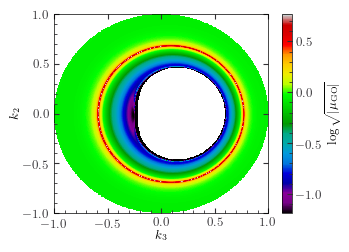

In [29]:
X, Y, Z = GSHEWaveform.smoothshadow(grid, np.log10(mugeo**0.5), 2500, method="linear")
qs = [1, 99.9] # Colourbar percentiles

GSHEWaveform.setmplstyle("../plot_style.txt")

fig, ax = plt.subplots()
vmin, vmax = np.percentile(Z[~np.isnan(Z)].reshape(-1,), qs)
cm = ax.pcolormesh(-X, Y, Z, shading="auto", cmap="nipy_spectral", rasterized=True, vmin=vmin, vmax=vmax)


fig.colorbar(cm, ax=ax, label=r"$\log \sqrt{|\mu_{\rm GO}|}$")
ax.set_xlabel("$k_3$")
ax.set_ylabel("$k_2$")
# plt.savefig("/Users/richard/Downloads/shadow_mu.pdf", dpi=600, bbox_inches="tight")
fig.show()

In [30]:
Xgshe = data["Xgshe"]
Xgeo = data["Xgeo"]
betas = data["betas"]
eps = data["eps"]
grid = data["grid"]
N = Xgeo.shape[0]

In [31]:
notnans = ~np.isnan(Xgeo[:, 2])
dt = Xgshe[:, :, 2] - Xgeo[:, 2].reshape(-1, 1)

In [32]:
dtsign = np.sign(dt)

i = 0
delay_consistentsign = np.asarray([np.alltrue(dtsign[i, 1:] == dtsign[i, 0]) for i in range(N)])


dtsign[~delay_consistentsign, :] = np.nan

dtsign = dtsign[:, 0]

parity = np.sign(Xgeo[:, 8])

In [34]:
m = ~(np.isnan(dtsign) | np.isnan(parity))

# dtsign
vals = np.full(N, np.nan)
vals[m] = dtsign[m]
hull = GSHEWaveform.build_shadowhull(grid, vals, N=200)
vals = GSHEWaveform.fillshadow(grid, vals, hull)
Xsign, Ysign, Zsign = GSHEWaveform.smoothshadow(grid, vals, 2500, method="nearest")


# Parity
vals = np.full(N, np.nan)
vals[m] = parity[m]
hull = GSHEWaveform.build_shadowhull(grid, vals, N=200)
vals = GSHEWaveform.fillshadow(grid, vals, hull)
Xpar, Ypar, Zpar = GSHEWaveform.smoothshadow(grid, vals, 2500, method="nearest")


# dtsign == parity sign
vals = np.full(N, np.nan)
vals[m] = parity[m] == dtsign[m]
hull = GSHEWaveform.build_shadowhull(grid, vals, N=200)
vals = GSHEWaveform.fillshadow(grid, vals, hull)
Xcomp, Ycomp, Zcomp = GSHEWaveform.smoothshadow(grid, vals, 2500, method="nearest")


# GSHE parity sign
vals = np.full(N, np.nan)
vals[m] = np.sign(Xgshe[m, -1, 8])
hull = GSHEWaveform.build_shadowhull(grid, vals, N=200)
vals = GSHEWaveform.fillshadow(grid, vals, hull)
Xgshe, Ygshe, Zgshe = GSHEWaveform.smoothshadow(grid, vals, 2500, method="nearest")

<ipython-input-35-4a7ff1fdaa6e>:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


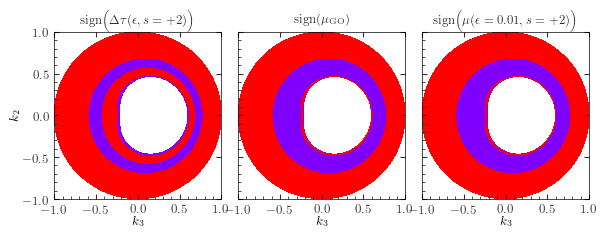

In [35]:

GSHEWaveform.setmplstyle("../plot_style.txt")

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(3.45*2, 3.45*0.75))
fig.subplots_adjust(hspace=0, wspace=0.1)



axes[0].pcolormesh(-Xsign, Ysign, Zsign, shading="auto", rasterized=True, cmap="rainbow")
axes[1].pcolormesh(-Xpar, Ypar, Zpar, shading="auto", rasterized=True, cmap="rainbow")
axes[2].pcolormesh(-Xgshe, Ygshe, Zgshe, shading="auto", rasterized=True, cmap="rainbow")



for ax in axes:
    ax.set_aspect("equal")
    ax.set_xlabel("$k_3$")
axes[0].set_ylabel("$k_2$")

axes[0].set_title(r"$\mathrm{sign}\bigl(\Delta \tau(\epsilon, s=+2)\bigr)$")
axes[1].set_title(r"$\mathrm{sign}(\mu_{\rm GO})$")
axes[2].set_title(r"$\mathrm{sign}\bigl(\mu(\epsilon=0.01, s=+2)\bigr)$")


#plt.savefig("/Users/richard/Downloads/parity_comp.pdf", dpi=600, bbox_inches="tight")
fig.show()